In [36]:
import pandas as pd
train=pd.read_csv('Training Data.csv')
test=pd.read_csv('Test Data.csv')

In [33]:
test6=pd.read_csv('Test Data.csv')

In [41]:
dataset = pd.concat([train ,test])

In [42]:
dataset["profession"] = dataset["profession"].str.replace("_"," ")

In [43]:
B_tech = [int(i in ["Mechanical engineer","Web designer","Software Developer","Design Engineer","Chemical engineer","Biomedical Engineer","Computer hardware engineer","Petroleum Engineer","Engineer","Civil engineer","Industrial Engineer","Mechanical engineer"]) for i in dataset ["profession"]]
dataset ["B_tech"] = pd.Series(B_tech)

In [44]:
public_service = [int(i in ["Civil servant","Firefighter","Politician","Police officer","Surveyor","Secretary","Magistrate","Lawyer","Army officer"]) for i in dataset ["profession"]]
dataset ["public_service"] = pd.Series(public_service)

In [45]:
design = [int(i in ["Architect","Designer","Artist","Design Engineer","Graphic Designer","Fashion Designer","Drafter"]) for i in dataset ["profession"]]
dataset ["design"] = pd.Series(design)
medicine = [int(i in ["Physician","Dentist","Microbiologist","Surgeon","Psychologist"]) for i in dataset ["profession"]]
dataset ["medicine"] = pd.Series(medicine)
finance = [int(i in ["Chartered Accountant","Economist","Financial Analyst","Statistician"]) for i in dataset ["profession"]]
dataset ["finance"] = pd.Series(finance)
self = [int(i in ["Technical writer","Librarian","Flight attendant","Air traffic controller","Hotel Manager","Comedian","Aviator","Official","Geologist","Chef","Scientist","Consultant","Technology specialist"]) for i in dataset ["profession"]]
dataset ["self"] = pd.Series(self)

In [46]:
dataset["incomeperprofession"] = dataset.groupby(["income","profession"])["Id"].transform("count")
dataset["incomeperstate"] = dataset.groupby(["income","state"])["Id"].transform("count")

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#pip install rfpimp
#pip install catboost
from sklearn.metrics import mean_absolute_error,accuracy_score,roc_auc_score
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV,GroupKFold,train_test_split,StratifiedShuffleSplit
from rfpimp import *
from tqdm import tqdm
from catboost import *
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn import svm
import xgboost

In [37]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes                 

(Id                     0
 income                 0
 age                    0
 experience             0
 married                0
 house_ownership        0
 car_ownership          0
 profession             0
 city                   0
 state                  0
 current_job_years      0
 current_house_years    0
 risk_flag              0
 dtype: int64,
 id                     0
 income                 0
 age                    0
 experience             0
 married                0
 house_ownership        0
 car_ownership          0
 profession             0
 city                   0
 state                  0
 current_job_years      0
 current_house_years    0
 dtype: int64,
 (252000, 13),
 (28000, 12),
 Id                      int64
 income                  int64
 age                     int64
 experience              int64
 married                object
 house_ownership        object
 car_ownership          object
 profession             object
 city                   object
 state      

In [38]:
df=pd.concat([train,test])

In [39]:
df.head()

Id   income  age  experience  married house_ownership car_ownership  \
0  1.0  1303835   23           3   single          rented            no   
1  2.0  7574516   40          10   single          rented            no   
2  3.0  3991815   66           4  married          rented            no   
3  4.0  6256451   41           2   single          rented           yes   
4  5.0  5768871   47          11   single          rented            no   

            profession                 city           state  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh   
1   Software_Developer             Parbhani     Maharashtra   
2     Technical_writer            Alappuzha          Kerala   
3   Software_Developer          Bhubaneswar          Odisha   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   

   current_job_years  current_house_years  risk_flag  id  
0                  3                   13        0.0 NaN  
1                  9                   13        0.0 NaN  
2                  4                   10        0.0 NaN  
3                  2                   12        1.0 NaN  
4                  3                   14        1.0 NaN

In [40]:
from sklearn.preprocessing import LabelEncoder
x=['profession','house_ownership','married','city','state','car_ownership']
for i in x:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])
  df[i]=df[i]+1

In [41]:
df = pd.get_dummies(df, columns=['married','house_ownership','car_ownership','experience'])

In [63]:
df['profession'].nunique()

74

In [60]:
train = df[df['risk_flag'].isnull()==False]
test = df[df['risk_flag'].isnull()==True]
del test['risk_flag']

In [43]:
train_df=train.copy()
test_df=test.copy()

In [44]:
from math import sqrt 
from sklearn.metrics import roc_auc_score

In [45]:
test_df.drop(['id'],axis=1,inplace=True)
train_df.drop(['id'],axis=1,inplace=True)

In [63]:
X = train_df.drop(labels=['risk_flag'], axis=1)
y = train_df['risk_flag'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [64]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((226800, 36), (226800,), (25200, 36), (25200,))

In [65]:
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [66]:
dataset.head()

NameError: name 'dataset' is not defined

In [59]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(#loss_function='CrossEntropy', 
                         eval_metric='AUC', 
                         #classes_count=2,
                         depth=3,
                         random_seed=121, 
                         iterations=1000, 
                         learning_rate=0.4,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         border_count=100,
                         od_wait=500)
cat.fit(X_train, y_train, verbose=100,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)
predictions = cat.predict(X_cv)
print('accuracy:', roc_auc_score(y_cv, predictions))

0:	test: 0.5773533	test1: 0.5742971	best: 0.5742971 (0)	total: 327ms	remaining: 5m 26s
100:	test: 0.7681911	test1: 0.7652084	best: 0.7652084 (100)	total: 6.03s	remaining: 53.7s
200:	test: 0.8117882	test1: 0.8038421	best: 0.8038421 (200)	total: 11.6s	remaining: 46s
300:	test: 0.8409551	test1: 0.8330201	best: 0.8330810 (299)	total: 17.1s	remaining: 39.8s
400:	test: 0.8634506	test1: 0.8544055	best: 0.8544055 (400)	total: 22.7s	remaining: 33.9s
500:	test: 0.8788750	test1: 0.8668103	best: 0.8668103 (500)	total: 28.2s	remaining: 28.1s
600:	test: 0.8902865	test1: 0.8774807	best: 0.8774807 (600)	total: 33.8s	remaining: 22.4s
700:	test: 0.9011057	test1: 0.8867535	best: 0.8868014 (696)	total: 39.3s	remaining: 16.8s
800:	test: 0.9092806	test1: 0.8937065	best: 0.8937065 (800)	total: 44.9s	remaining: 11.1s
900:	test: 0.9149204	test1: 0.8992738	best: 0.8992880 (899)	total: 50.5s	remaining: 5.54s
999:	test: 0.9197980	test1: 0.9032645	best: 0.9032645 (999)	total: 56s	remaining: 0us

bestTest = 0.90326

In [60]:
print('accuracy:', roc_auc_score(y_cv, predictions))
print(roc_auc_score(y_train,cat.predict(X_train)))

accuracy: 0.607225024114648
0.6136926423933103


In [67]:
cols=['income','age','city','profession','state','current_job_years','incomeperprofession','current_house_years','incomeperstate','car_ownership_no','car_ownership_yes','medicine']
x=X[cols]
y=y

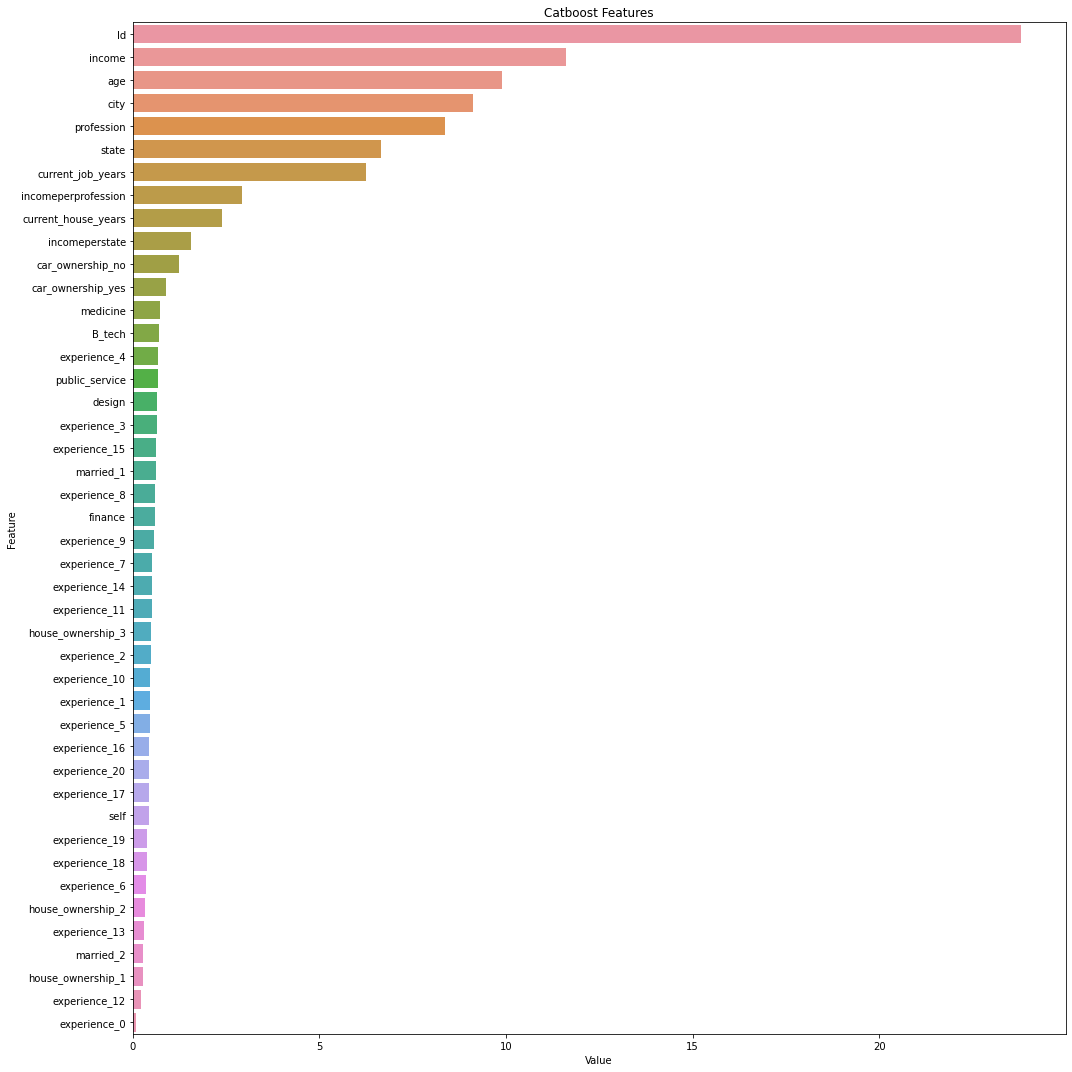

In [61]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [34]:
Xtest = test_df
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='AUC', 
                         classes_count=3,
                         depth=6,
                         random_seed=121, 
                         iterations=100, 
                         learning_rate=0.1,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=0.8, 
                         random_strength=1,
                         od_type='Iter', 
                         border_count=100,
                         od_wait=500)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", roc_auc_score(y_test,y_pred_cat, average='weighted'))

    errcat.append(roc_auc_score(y_test,y_pred_cat, average='weighted'))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.5004878048780488


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.501440338990144


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.5009502692429522


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.5004848093083387


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.5019249278152069


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.5011232349165597


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.5019582245430809


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.501103130259512


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.500795165394402


Found only 2 unique classes in the data, but have defined 3 classes. Probably something is wrong with data.


Accuracy:  0.500634462972984


In [19]:
train_df.head()

Id   income  age  profession  city  state  current_job_years  \
0  1.0  1303835   23          51   263     18                  3   
1  2.0  7574516   40          64   237     19                  9   
2  3.0  3991815   66          69     9     16                  4   
3  4.0  6256451   41          64    56     22                  2   
4  5.0  5768871   47          19   313     28                  3   

   current_house_years  risk_flag  married_1  ...  experience_11  \
0                   13        0.0          0  ...              0   
1                   13        0.0          0  ...              0   
2                   10        0.0          1  ...              0   
3                   12        1.0          0  ...              0   
4                   14        1.0          0  ...              1   

   experience_12  experience_13  experience_14  experience_15  experience_16  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   experience_17  experience_18  experience_19  experience_20  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 37 columns]

In [16]:
X = train_df.drop(labels=['risk_flag'], axis=1)
y = train_df['risk_flag'].values
scale = StandardScaler()
X = scale.fit_transform(X)
test = scale.transform(test_df)

In [68]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [100]:
from catboost import CatBoostClassifier, Pool
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)
eval_dataset = Pool(x_test,
                    y_test)
model = CatBoostClassifier(learning_rate=0.02,iterations=800,depth=8,
                           eval_metric='AUC',task_type="CPU",devices='0:1')

model.fit(x_train,
          y_train,
          eval_set=eval_dataset,
          verbose=True)

0:	test: 0.5836607	best: 0.5836607 (0)	total: 107ms	remaining: 1m 25s
1:	test: 0.6141744	best: 0.6141744 (1)	total: 198ms	remaining: 1m 18s
2:	test: 0.6246705	best: 0.6246705 (2)	total: 287ms	remaining: 1m 16s
3:	test: 0.6332734	best: 0.6332734 (3)	total: 415ms	remaining: 1m 22s
4:	test: 0.6403410	best: 0.6403410 (4)	total: 562ms	remaining: 1m 29s
5:	test: 0.6499207	best: 0.6499207 (5)	total: 695ms	remaining: 1m 31s
6:	test: 0.6572482	best: 0.6572482 (6)	total: 843ms	remaining: 1m 35s
7:	test: 0.6564537	best: 0.6572482 (6)	total: 1.01s	remaining: 1m 39s
8:	test: 0.6628406	best: 0.6628406 (8)	total: 1.12s	remaining: 1m 38s
9:	test: 0.6699704	best: 0.6699704 (9)	total: 1.21s	remaining: 1m 35s
10:	test: 0.6726136	best: 0.6726136 (10)	total: 1.33s	remaining: 1m 35s
11:	test: 0.6728893	best: 0.6728893 (11)	total: 1.45s	remaining: 1m 35s
12:	test: 0.6764011	best: 0.6764011 (12)	total: 1.56s	remaining: 1m 34s
13:	test: 0.6800130	best: 0.6800130 (13)	total: 1.65s	remaining: 1m 32s
14:	test: 0.

115:	test: 0.7503151	best: 0.7503151 (115)	total: 11.9s	remaining: 1m 10s
116:	test: 0.7507825	best: 0.7507825 (116)	total: 12s	remaining: 1m 10s
117:	test: 0.7513520	best: 0.7513520 (117)	total: 12.1s	remaining: 1m 10s
118:	test: 0.7511288	best: 0.7513520 (117)	total: 12.3s	remaining: 1m 10s
119:	test: 0.7510346	best: 0.7513520 (117)	total: 12.4s	remaining: 1m 10s
120:	test: 0.7511016	best: 0.7513520 (117)	total: 12.5s	remaining: 1m 9s
121:	test: 0.7521125	best: 0.7521125 (121)	total: 12.6s	remaining: 1m 9s
122:	test: 0.7521771	best: 0.7521771 (122)	total: 12.7s	remaining: 1m 10s
123:	test: 0.7541023	best: 0.7541023 (123)	total: 12.8s	remaining: 1m 9s
124:	test: 0.7541216	best: 0.7541216 (124)	total: 12.9s	remaining: 1m 9s
125:	test: 0.7549208	best: 0.7549208 (125)	total: 13s	remaining: 1m 9s
126:	test: 0.7555875	best: 0.7555875 (126)	total: 13.1s	remaining: 1m 9s
127:	test: 0.7564407	best: 0.7564407 (127)	total: 13.2s	remaining: 1m 9s
128:	test: 0.7569005	best: 0.7569005 (128)	total:

230:	test: 0.8043686	best: 0.8043686 (230)	total: 23.5s	remaining: 57.8s
231:	test: 0.8047597	best: 0.8047597 (231)	total: 23.6s	remaining: 57.7s
232:	test: 0.8054952	best: 0.8054952 (232)	total: 23.6s	remaining: 57.5s
233:	test: 0.8057088	best: 0.8057088 (233)	total: 23.7s	remaining: 57.4s
234:	test: 0.8062480	best: 0.8062480 (234)	total: 23.8s	remaining: 57.3s
235:	test: 0.8062707	best: 0.8062707 (235)	total: 23.9s	remaining: 57.2s
236:	test: 0.8065547	best: 0.8065547 (236)	total: 24s	remaining: 57s
237:	test: 0.8069417	best: 0.8069417 (237)	total: 24.1s	remaining: 56.9s
238:	test: 0.8071722	best: 0.8071722 (238)	total: 24.2s	remaining: 56.8s
239:	test: 0.8077432	best: 0.8077432 (239)	total: 24.3s	remaining: 56.7s
240:	test: 0.8082609	best: 0.8082609 (240)	total: 24.4s	remaining: 56.5s
241:	test: 0.8083720	best: 0.8083720 (241)	total: 24.5s	remaining: 56.4s
242:	test: 0.8085891	best: 0.8085891 (242)	total: 24.5s	remaining: 56.3s
243:	test: 0.8093800	best: 0.8093800 (243)	total: 24.6s

345:	test: 0.8464299	best: 0.8464299 (345)	total: 34.3s	remaining: 45s
346:	test: 0.8467260	best: 0.8467260 (346)	total: 34.4s	remaining: 44.9s
347:	test: 0.8472302	best: 0.8472302 (347)	total: 34.5s	remaining: 44.8s
348:	test: 0.8478349	best: 0.8478349 (348)	total: 34.6s	remaining: 44.7s
349:	test: 0.8478377	best: 0.8478377 (349)	total: 34.7s	remaining: 44.6s
350:	test: 0.8481324	best: 0.8481324 (350)	total: 34.8s	remaining: 44.5s
351:	test: 0.8485956	best: 0.8485956 (351)	total: 34.9s	remaining: 44.4s
352:	test: 0.8491192	best: 0.8491192 (352)	total: 35s	remaining: 44.3s
353:	test: 0.8493982	best: 0.8493982 (353)	total: 35s	remaining: 44.2s
354:	test: 0.8498263	best: 0.8498263 (354)	total: 35.1s	remaining: 44.1s
355:	test: 0.8501207	best: 0.8501207 (355)	total: 35.2s	remaining: 43.9s
356:	test: 0.8503655	best: 0.8503655 (356)	total: 35.3s	remaining: 43.8s
357:	test: 0.8508964	best: 0.8508964 (357)	total: 35.4s	remaining: 43.7s
358:	test: 0.8512444	best: 0.8512444 (358)	total: 35.5s	r

459:	test: 0.8768017	best: 0.8768017 (459)	total: 45.3s	remaining: 33.5s
460:	test: 0.8770773	best: 0.8770773 (460)	total: 45.4s	remaining: 33.4s
461:	test: 0.8771160	best: 0.8771160 (461)	total: 45.5s	remaining: 33.3s
462:	test: 0.8774047	best: 0.8774047 (462)	total: 45.6s	remaining: 33.2s
463:	test: 0.8776576	best: 0.8776576 (463)	total: 45.7s	remaining: 33.1s
464:	test: 0.8781371	best: 0.8781371 (464)	total: 45.8s	remaining: 33s
465:	test: 0.8784277	best: 0.8784277 (465)	total: 45.9s	remaining: 32.9s
466:	test: 0.8786377	best: 0.8786377 (466)	total: 46s	remaining: 32.8s
467:	test: 0.8789351	best: 0.8789351 (467)	total: 46.1s	remaining: 32.7s
468:	test: 0.8791629	best: 0.8791629 (468)	total: 46.2s	remaining: 32.6s
469:	test: 0.8794892	best: 0.8794892 (469)	total: 46.3s	remaining: 32.5s
470:	test: 0.8797667	best: 0.8797667 (470)	total: 46.4s	remaining: 32.4s
471:	test: 0.8799626	best: 0.8799626 (471)	total: 46.5s	remaining: 32.3s
472:	test: 0.8801551	best: 0.8801551 (472)	total: 46.5s

574:	test: 0.8972625	best: 0.8972625 (574)	total: 56s	remaining: 21.9s
575:	test: 0.8974203	best: 0.8974203 (575)	total: 56.1s	remaining: 21.8s
576:	test: 0.8975206	best: 0.8975206 (576)	total: 56.2s	remaining: 21.7s
577:	test: 0.8976494	best: 0.8976494 (577)	total: 56.3s	remaining: 21.6s
578:	test: 0.8978006	best: 0.8978006 (578)	total: 56.4s	remaining: 21.5s
579:	test: 0.8979189	best: 0.8979189 (579)	total: 56.5s	remaining: 21.4s
580:	test: 0.8981251	best: 0.8981251 (580)	total: 56.6s	remaining: 21.3s
581:	test: 0.8982490	best: 0.8982490 (581)	total: 56.7s	remaining: 21.2s
582:	test: 0.8983784	best: 0.8983784 (582)	total: 56.7s	remaining: 21.1s
583:	test: 0.8985489	best: 0.8985489 (583)	total: 56.8s	remaining: 21s
584:	test: 0.8987084	best: 0.8987084 (584)	total: 56.9s	remaining: 20.9s
585:	test: 0.8987831	best: 0.8987831 (585)	total: 57s	remaining: 20.8s
586:	test: 0.8988580	best: 0.8988580 (586)	total: 57.1s	remaining: 20.7s
587:	test: 0.8989528	best: 0.8989528 (587)	total: 57.2s	r

689:	test: 0.9124238	best: 0.9124238 (689)	total: 1m 7s	remaining: 10.7s
690:	test: 0.9124716	best: 0.9124716 (690)	total: 1m 7s	remaining: 10.6s
691:	test: 0.9126724	best: 0.9126724 (691)	total: 1m 7s	remaining: 10.6s
692:	test: 0.9127106	best: 0.9127106 (692)	total: 1m 7s	remaining: 10.5s
693:	test: 0.9127855	best: 0.9127855 (693)	total: 1m 7s	remaining: 10.4s
694:	test: 0.9128380	best: 0.9128380 (694)	total: 1m 7s	remaining: 10.3s
695:	test: 0.9129625	best: 0.9129625 (695)	total: 1m 7s	remaining: 10.2s
696:	test: 0.9130128	best: 0.9130128 (696)	total: 1m 8s	remaining: 10.1s
697:	test: 0.9131165	best: 0.9131165 (697)	total: 1m 8s	remaining: 9.96s
698:	test: 0.9132377	best: 0.9132377 (698)	total: 1m 8s	remaining: 9.86s
699:	test: 0.9133097	best: 0.9133097 (699)	total: 1m 8s	remaining: 9.76s
700:	test: 0.9134513	best: 0.9134513 (700)	total: 1m 8s	remaining: 9.67s
701:	test: 0.9134781	best: 0.9134781 (701)	total: 1m 8s	remaining: 9.57s
702:	test: 0.9135260	best: 0.9135260 (702)	total: 1

In [105]:
model.get_feature_importance()

array([27.66369669,  9.42784841,  9.96426807,  8.18352915,  8.18794362,
        7.31334999,  6.69433485,  5.73702445,  0.87313542,  0.61275533,
        0.17497891,  0.38372195,  0.57414147,  2.74449267,  1.97359246,
        0.3020916 ,  0.35258287,  1.12631004,  0.73113695,  0.62000002,
        0.30103788,  0.04405811,  0.18304769,  0.17094905,  0.47505224,
        0.46565362,  0.67118612,  0.18894182,  0.36372478,  0.39484706,
        0.80511172,  0.38061583,  0.35583824,  0.93223604,  0.30507712,
        0.32168776])

In [124]:
roc_auc_score(y_train,model.predict(x_train))

0.9244423984531341

In [120]:
roc_auc_score(y_val,model.predict(x_val))

0.9657735546592878

In [46]:
y = train_df.loc[:,'risk_flag']
X = train_df.drop('risk_flag',axis = 1)
X

Id   income  age  profession  city  state  current_job_years  \
0            1.0  1303835   23          51   263     18                  3   
1            2.0  7574516   40          64   237     19                  9   
2            3.0  3991815   66          69     9     16                  4   
3            4.0  6256451   41          64    56     22                  2   
4            5.0  5768871   47          19   313     28                  3   
...          ...      ...  ...         ...   ...    ...                ...   
251995  251996.0  8154883   43          66   168     37                  6   
251996  251997.0  2843572   26           6   263     18                  6   
251997  251998.0  4522448   46          28   147     19                  7   
251998  251999.0  6507128   45          42   243     23                  0   
251999  252000.0  9070230   70          65    27     28                  7   

        current_house_years  married_1  married_2  ...  experience_11  \
0                        13          0          1  ...              0   
1                        13          0          1  ...              0   
2                        10          1          0  ...              0   
3                        12          0          1  ...              0   
4                        14          0          1  ...              1   
...                     ...        ...        ...  ...            ...   
251995                   11          0          1  ...              0   
251996                   11          0          1  ...              0   
251997                   12          0          1  ...              0   
251998                   10          0          1  ...              0   
251999                   11          0          1  ...              0   

        experience_12  experience_13  experience_14  experience_15  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
251995              0              1              0              0   
251996              0              0              0              0   
251997              0              0              0              0   
251998              0              0              0              0   
251999              0              0              0              0   

        experience_16  experience_17  experience_18  experience_19  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
251995              0              0              0              0   
251996              0              0              0              0   
251997              0              0              0              0   
251998              0              0              0              0   
251999              0              1              0              0   

        experience_20  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
251995              0  
251996              0  
251997              0  
251998              0  
251999              0  

[252000 rows x 36 columns]

In [47]:
X.head()

Id   income  age  profession  city  state  current_job_years  \
0  1.0  1303835   23          51   263     18                  3   
1  2.0  7574516   40          64   237     19                  9   
2  3.0  3991815   66          69     9     16                  4   
3  4.0  6256451   41          64    56     22                  2   
4  5.0  5768871   47          19   313     28                  3   

   current_house_years  married_1  married_2  ...  experience_11  \
0                   13          0          1  ...              0   
1                   13          0          1  ...              0   
2                   10          1          0  ...              0   
3                   12          0          1  ...              0   
4                   14          0          1  ...              1   

   experience_12  experience_13  experience_14  experience_15  experience_16  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   experience_17  experience_18  experience_19  experience_20  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 36 columns]

In [48]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [49]:
def learning_rate_010_decay_power_0995(current_iter): 
    base_learning_rate = 0.0009
    lr = base_learning_rate * np.power(.995, current_iter) 
    return lr if lr > 1e-4 else 1e-4

In [53]:
from sklearn.metrics import roc_auc_score,auc
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose=100,boosting_type='dart',n_estimators=1000,depth=10,learning_rate=.8,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5random_state=42,n_jobs=-1)

clf = model.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Info] Number of positive: 24743, number of negative: 176857
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.927232
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.311989
[LightGBM] [Debug] init for col-wise cost 0.003401 seconds, init for row-wise cost 0.017028 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 201600, number of used features: 36
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122733 -> initscore=-1.966799
[LightGBM] [Info] Start training from score -1.966799
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Deb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [D

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [De

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 8
[

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and max_depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 2
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Warning] No further sp

[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[L

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree wit

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 4
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_dep

[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_de

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and max_depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 2 and max_depth = 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_dept

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_dep

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [54]:
roc_auc_score(y_train,clf.predict(x_train))

0.9998642971440203

<h3>best-0.8823359686211244 alfha=0.8

In [55]:
roc_auc_score(y_val,clf.predict(x_val))

0.8823359686211244

In [ ]:
y_pred_totxgb=[]
errx=[]
feature_importance_df = pd.DataFrame()

#For Stacking
xgb_train_res = pd.DataFrame()
xgb_test_res = pd.DataFrame()

from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=4,shuffle=True,random_state=1996)
i=1
for train_index, test_index in fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    depth=5
    m=XGBClassifier(n_estimators=350,learning_rate=0.01,max_depth=depth,eval_metric ="auc")
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=50,verbose=200)
    preds=m.predict(X_test)
    print(f"roc is: {np.sqrt(roc_auc_score(np.expm1(y_test), np.expm1(preds)))}")
    errx.append(np.sqrt(roc_auc_score(np.expm1(y_test), np.expm1(preds))))
    #print(f"RMSLE is:",rmsle_lgb(y_test, preds))
    #errx.append(rmsle_lgb(y_test, preds))
    p = m.predict(test)
    y_pred_totxgb.append(p)
    
    xgb_train_res["iteration_"+str(i)] = m.predict(X)
    xgb_test_res["iteration_"+str(i)] = m.predict(final_featurest)
    i+=1

In [56]:
y_pred = clf.predict(test_df)

In [94]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [102]:
y_pred=clf.predict(test_df)

In [50]:
pp=clf.predict_proba(x_val)[:,1]

In [51]:
pp

array([1.45205873e-01, 1.01189001e-03, 3.40628129e-05, ...,
       9.66772120e-01, 1.26730379e-01, 7.26871956e-01])

In [57]:
y_pred=y_pred.astype('int')

In [59]:
sub=pd.DataFrame({'id':test6['id'],
                 'risk_flag':y_pred})
sub.to_csv('lr.8_5000_goss.csv',index=False)

In [60]:
test6['id'].shape

(28000,)

In [135]:
oof_pred               = np.zeros((len(train_df),))
y_pred_final           = np.zeros((len(test_df),))
num_models             = 3

n_splits               = 20
error                  = []

kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=294)
    
for i,(train_idx,val_idx) in enumerate(kf.split(X,y)):    
    
    wghts                     = [0]*num_models
    test_roc_score            = []
    
    
    X_train, y_train = X.iloc[train_idx,:], y.iloc[train_idx]

    X_val, y_val = X.iloc[val_idx, :], y.iloc[val_idx]
    

    print('\nFold: {}\n'.format(i+1))

    model1 = LGBMClassifier(verbose=100,boosting_type='gbdt',n_estimators=1000,depth=10,learning_rate=0.45,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)
    model1.fit(X_train,y_train)
    testpred1 = model1.predict(X_val)
    test_roc_score.append(roc_auc_score(y_val, testpred1))
    print("Test ROC AUC for model 1: %.4f"%(roc_auc_score(y_val, testpred1)))
    
    model2 = LGBMClassifier(verbose=100,boosting_type='dart',n_estimators=2000,depth=10,learning_rate=0.6,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)
    model2.fit(X_train,y_train)
    testpred2 = model2.predict(X_val)
    test_roc_score.append(roc_auc_score(y_val, testpred2))
    print("Test ROC AUC for model 2: %.4f"%(roc_auc_score(y_val, testpred2)))
    
    model3 = LGBMClassifier(verbose=100,boosting_type='goss',n_estimators=5000,depth=10,learning_rate=0.8,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)
    model3.fit(X_train,y_train)
    testpred3 = model3.predict(X_val)
    test_roc_score.append(roc_auc_score(y_val, testpred3))
    print("Test ROC AUC for model 3: %.4f"%(roc_auc_score(y_val, testpred3)))
    
    wghts              = np.exp(-1000*np.array(test_roc_score/sum(test_roc_score)))
    wghts              = wghts/sum(wghts)
    
    val_pred           = wghts[0]*testpred1+wghts[1]*testpred2 +wghts[2]*testpred3
    print('validation roc_auc_score fold-',i+1,': ',roc_auc_score(y_val, val_pred))
    
    oof_pred[val_idx]  = val_pred
    y_pred_final += (model1.predict(test_df)+model2.predict(test_df)+model3.predict(test_df))/(n_splits)
    
    print('\n')
    
print('OOF ROC_AUC_Score:- ',(roc_auc_score(y,oof_pred)))


Fold: 1

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Info] Number of positive: 27897, number of negative: 198903
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.927206
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.311980
[LightGBM] [Debug] init for col-wise cost 0.004117 seconds, init for row-wise cost 0.014076 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 226800, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.123003 -> initscore=-1.964298
[LightGBM] [Info] Start training from score -1.964298
[LightGBM] [Debug] Trained a tree

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tre

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightG

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 6
[LightGBM] [Warning] No fu

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Warning

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debu

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [De

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth =

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth =

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No f

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 6
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [D

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warni

[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 7
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Deb

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warni

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [D

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [D

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[L

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Deb

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debu

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debu

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [D

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_dep

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[Li

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[Lig

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 6
[L

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 10
[LightGBM] [Debu

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No furt

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Wa

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 10
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [D

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and max_depth = 5
[LightGBM] [Warning

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Wa

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[Li

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and max_depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[Li

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 9
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 8
[Li

[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[L

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tre

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Wa

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [D

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 6
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth =

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[Lig

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 20
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Deb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Wa

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10


[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Deb

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Deb

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tre

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 10
[LightGBM]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 10
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [D

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth =

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
Test ROC AUC for model 3: 0.8811
validation roc_auc_score fold- 7 :  0.9268074368705298



Fold: 8

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Info] Num

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 9
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [D

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 7
[LightGBM]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [D

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and max_depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[Light

[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_dep

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 11
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a t

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] T

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tre

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [D

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 19 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] T

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 9
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 9
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[Li

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[Li

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 5
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tr

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No fur

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 7
[LightGBM] [Wa

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 13
[LightGBM] [Warni

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 4
[LightGBM] [Debug] Train

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 8
[LightGBM

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 9
[LightGBM] [Debu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [D

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 28 and max_depth = 8
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 21 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 11 and max_depth =

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 26 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightG

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 24 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[Li

[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max_depth = 7
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 27 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and max_depth =

In [137]:
y_pred_final2 = np.zeros((len(test_df),))
for i in range(len(y_pred_final)):
    if y_pred_final[i]<0.75:
        y_pred_final2[i]=0
    elif y_pred_final[i]>=0.75:
        y_pred_final2[i]=1

In [140]:
y_pred_final2[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0.])

In [143]:
y_pred_final2[-3]

0.0